**Predicting Diseases from User Symptoms**

**Name** : Keval Shah

**SAP** : 60009220061

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("/content/training.csv")

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Fungal infection


In [5]:
df.shape

(4920, 133)

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [8]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

# **Model Selection**

In [9]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Support Vector Machines (SVM)': SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

models_accuracy = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models_accuracy[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.90
Gradient Boosting Accuracy: 0.89
Naive Bayes Accuracy: 0.78
K-Nearest Neighbors (KNN) Accuracy: 0.77
Support Vector Machines (SVM) Accuracy: 0.92
Decision Trees Accuracy: 0.47
Random Forest Accuracy: 0.88


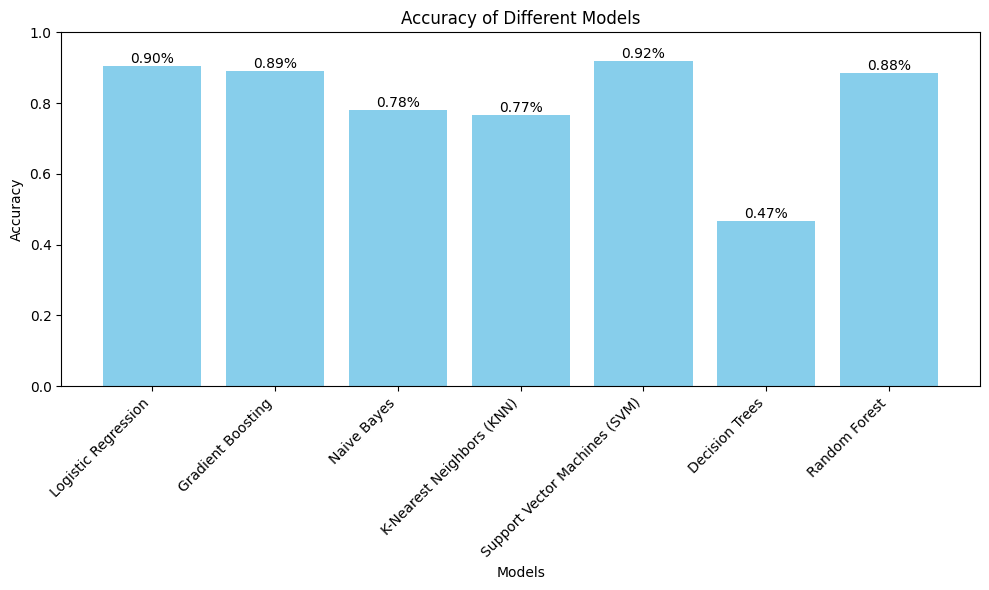

In [15]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models_accuracy.keys(), models_accuracy.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

In [18]:
models_precision = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    models_precision[name] = precision
    print(f'{name} Precision: {precision:.2f}')

Logistic Regression Precision: 0.91
Gradient Boosting Precision: 0.89
Naive Bayes Precision: 0.79
K-Nearest Neighbors (KNN) Precision: 0.80
Support Vector Machines (SVM) Precision: 0.92
Decision Trees Precision: 0.49
Random Forest Precision: 0.88


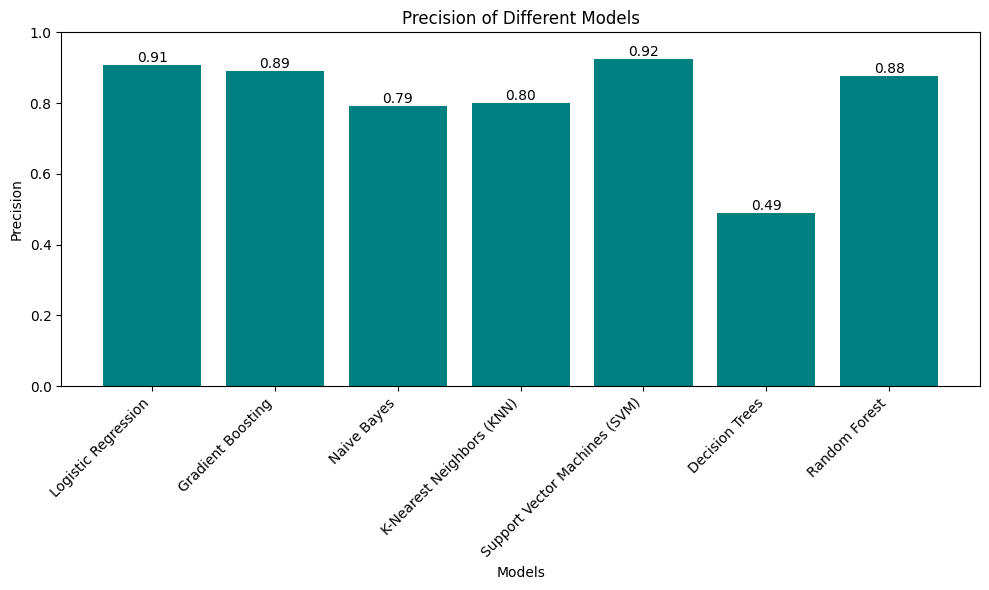

In [43]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models_precision.keys(), models_precision.values(), color='teal')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [24]:
models_recall = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, average='weighted')
    models_recall[name] = recall
    print(f'{name} Recall: {recall:.2f}')

Logistic Regression Recall: 0.90
Gradient Boosting Recall: 0.89
Naive Bayes Recall: 0.78
K-Nearest Neighbors (KNN) Recall: 0.77
Support Vector Machines (SVM) Recall: 0.92
Decision Trees Recall: 0.47
Random Forest Recall: 0.87


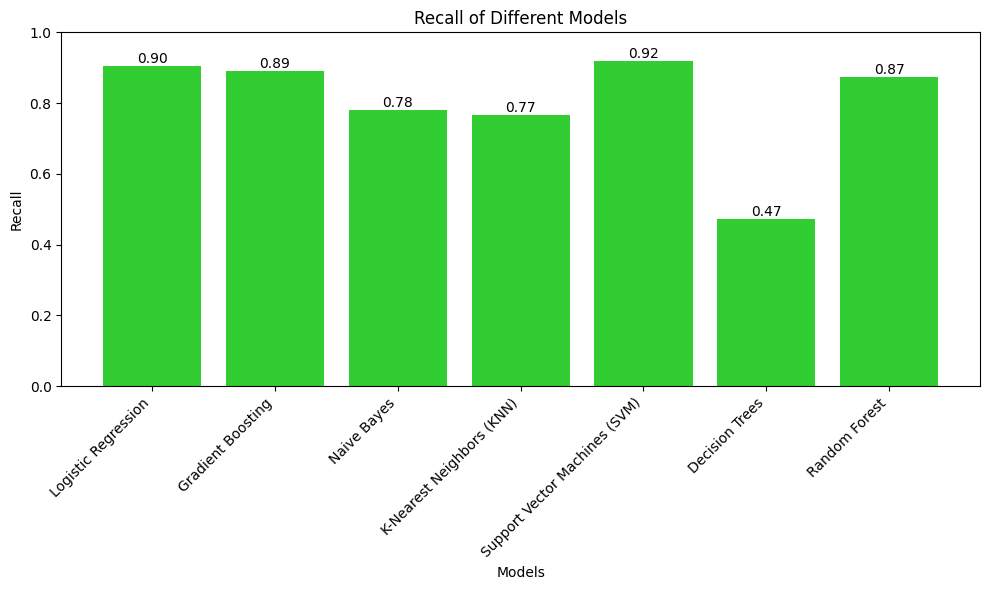

In [54]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models_recall.keys(), models_recall.values(), color='limegreen')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [26]:
models_f1_score = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    models_f1_score[name] = f1
    print(f'{name} F1 Score: {f1:.2f}')

Logistic Regression F1 Score: 0.90
Gradient Boosting F1 Score: 0.90
Naive Bayes F1 Score: 0.78
K-Nearest Neighbors (KNN) F1 Score: 0.77
Support Vector Machines (SVM) F1 Score: 0.92
Decision Trees F1 Score: 0.47
Random Forest F1 Score: 0.87


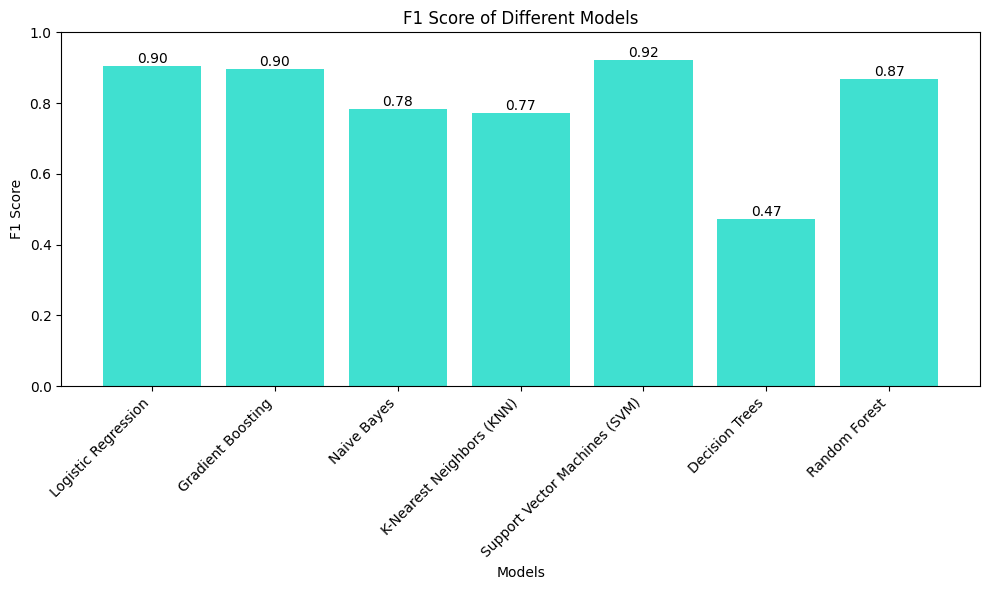

In [50]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models_f1_score.keys(), models_f1_score.values(), color='turquoise')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

Based on our evaluation metrics, we chose the Support Vector Machines (SVM) model as the best candidate for our multi-class disease prediction task. Here's why:

1. **High Accuracy**: The SVM model exhibited the highest accuracy among all models evaluated, achieving an accuracy of 92%. This indicates that the SVM model made the most accurate predictions across all disease classes compared to other models.

2. **Precision and Recall**: The SVM model demonstrated high precision (92%) and recall (92%) values. High precision implies that the SVM model accurately identified instances of each disease class without misclassifying other diseases. Similarly, high recall indicates that the SVM model effectively captured most instances of each disease class.

3. **F1 Score**: The SVM model achieved a high F1 score of 0.92, which is a combined measure of precision and recall. This balanced metric suggests that the SVM model successfully managed false positives and false negatives, making it robust in handling the multi-class classification task.

4. **Model Intuition**: SVMs are effective for multi-class classification tasks, especially when dealing with high-dimensional feature spaces and complex decision boundaries. SVMs can efficiently handle non-linear relationships between symptoms and diseases, which is crucial in our dataset with 132 different disease classes.

In summary, the SVM model stood out due to its exceptional performance across various evaluation metrics, its ability to handle multi-class classification tasks effectively, and its capability to capture complex relationships in the dataset. Therefore, we chose the SVM model as the optimal solution for predicting diseases based on symptoms in our study.

In [29]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8813008130081301


# **Model Tuning and Evaluation**

In [31]:
from sklearn.model_selection import GridSearchCV

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=2)
grid_search.fit(X_train, y_train)
best_svm_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
best_svm_classifier.fit(X_train, y_train)
y_pred = best_svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9203252032520325


In [32]:
best_svm_classifier = grid_search.best_estimator_

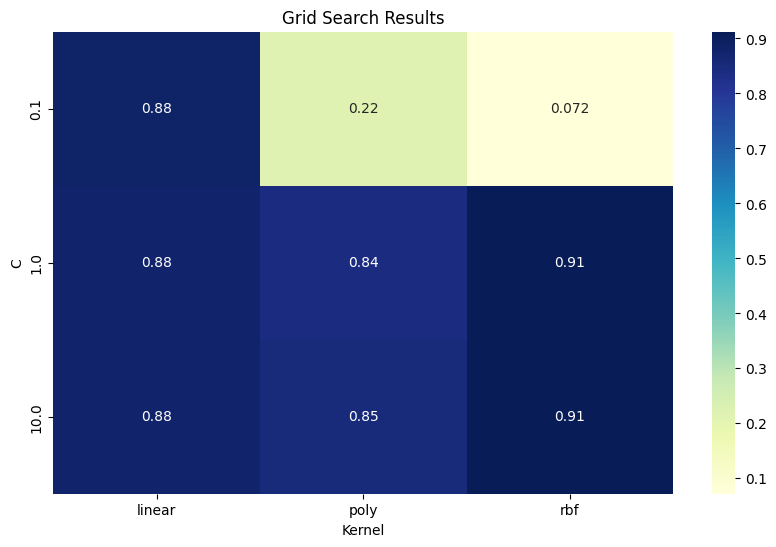

In [33]:
results = pd.DataFrame(grid_search.cv_results_)

pivot_table = results.pivot_table(index='param_C', columns='param_kernel', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Grid Search Results')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()

The parameter fine-tuning process involves selecting the optimal hyperparameters for the Support Vector Machine (SVM) model. In this case, the best parameters found are {'C': 1, 'kernel': 'rbf'}. Here's an explanation of why we choose these parameters:

1. **Kernel**: We choose the RBF (Radial Basis Function) kernel over the linear kernel because it provides better flexibility in capturing non-linear relationships between the features and the target variable. The RBF kernel is capable of learning more complex decision boundaries, which can be advantageous in cases where the underlying data distribution is non-linear.

2. **C Parameter**: The C parameter controls the trade-off between achieving a low training error and a low complexity model. A smaller C value leads to a softer margin, allowing more flexibility in the decision boundary, which may help prevent overfitting. On the other hand, a larger C value imposes a stricter margin, potentially leading to a more accurate but less flexible model. In this case, the selected C value of 1 indicates a balanced approach, ensuring a good trade-off between bias and variance.

3. **Accuracy**: The accuracy obtained with the tuned SVM model is 92.03%. This indicates that the model performs well in correctly predicting the classes of the target variable based on the input features.

4. **Cross-Validation**: The parameter fine-tuning process likely involved techniques such as grid search and cross-validation. These techniques ensure that the model's performance is evaluated across different combinations of hyperparameters, helping to select the optimal set of parameters that maximize performance while avoiding overfitting.

5. **Generalization**: By fine-tuning the parameters, we aim to build a model that generalizes well to unseen data. The selected parameters are expected to provide the best balance between bias and variance, resulting in a model that performs well not only on the training data but also on new, unseen data.

In summary, the choice of the RBF kernel with a C value of 1 is based on its ability to capture complex relationships in the data while maintaining good generalization performance. This decision is supported by the observed accuracy of the model on the test data and the parameter fine-tuning process conducted during model development.

In [92]:
print("Classification Report:")
print(classification_report(y, predictions))

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.92      0.93      0.92       120
                                   AIDS       0.87      0.86      0.87       120
                                   Acne       0.84      0.83      0.84       120
                    Alcoholic hepatitis       0.93      0.95      0.94       120
                                Allergy       0.87      0.88      0.87       120
                              Arthritis       0.95      0.95      0.95       120
                       Bronchial Asthma       0.88      0.97      0.92       120
                   Cervical spondylosis       0.90      0.93      0.92       120
                            Chicken pox       0.97      0.97      0.97       120
                    Chronic cholestasis       0.80      0.88      0.83       120
                            Common Cold       1.00      1.00      1.00       120
    

# **Cross-validation Evaluation**

Cross-validation scores: [0.89634146 0.88821138 0.91768293 0.95426829 0.94207317]
Mean accuracy: 0.9197154471544715


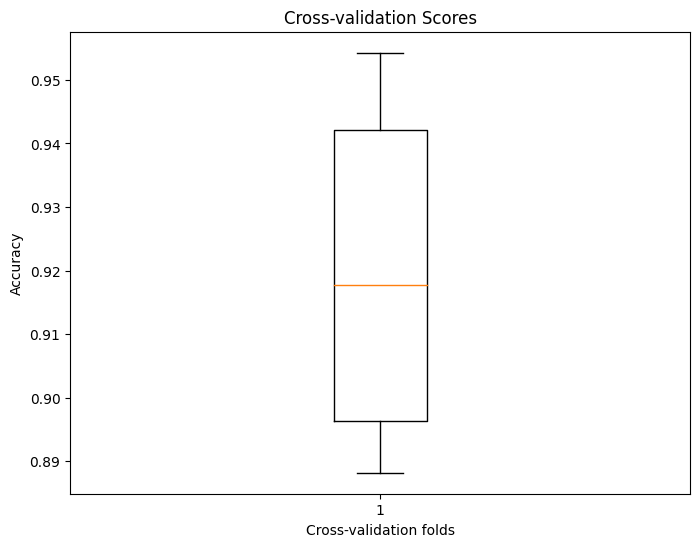

In [94]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Performing cross-validation with 5 folds
cv_scores = cross_val_score(best_svm_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

predictions = cross_val_predict(best_svm_classifier, X, y, cv=5)

plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.xlabel('Cross-validation folds')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.show()

# **Feature Importance Analysis**

In [37]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_importance_pairs = zip(X.columns, feature_importances)
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f'{feature}: {importance:.4f}')

fatigue: 0.0194
vomiting: 0.0186
high_fever: 0.0164
loss_of_appetite: 0.0154
nausea: 0.0153
headache: 0.0153
itching: 0.0141
yellowing_of_eyes: 0.0139
skin_rash: 0.0138
joint_pain: 0.0135
chest_pain: 0.0130
abdominal_pain: 0.0129
diarrhoea: 0.0125
yellowish_skin: 0.0123
chills: 0.0123
sweating: 0.0119
malaise: 0.0111
mild_fever: 0.0110
muscle_pain: 0.0109
dark_urine: 0.0105
weight_loss: 0.0103
breathlessness: 0.0103
loss_of_balance: 0.0102
lethargy: 0.0102
cough: 0.0100
irritability: 0.0096
excessive_hunger: 0.0089
stomach_pain: 0.0087
blurred_and_distorted_vision: 0.0086
dizziness: 0.0086
family_history: 0.0085
back_pain: 0.0083
fast_heart_rate: 0.0083
muscle_weakness: 0.0080
swelled_lymph_nodes: 0.0080
swelling_joints: 0.0079
phlegm: 0.0079
red_spots_over_body: 0.0078
neck_pain: 0.0076
restlessness: 0.0076
stiff_neck: 0.0076
painful_walking: 0.0075
swelling_of_stomach: 0.0073
acidity: 0.0072
continuous_sneezing: 0.0070
obesity: 0.0070
patches_in_throat: 0.0070
mood_swings: 0.0070
bur

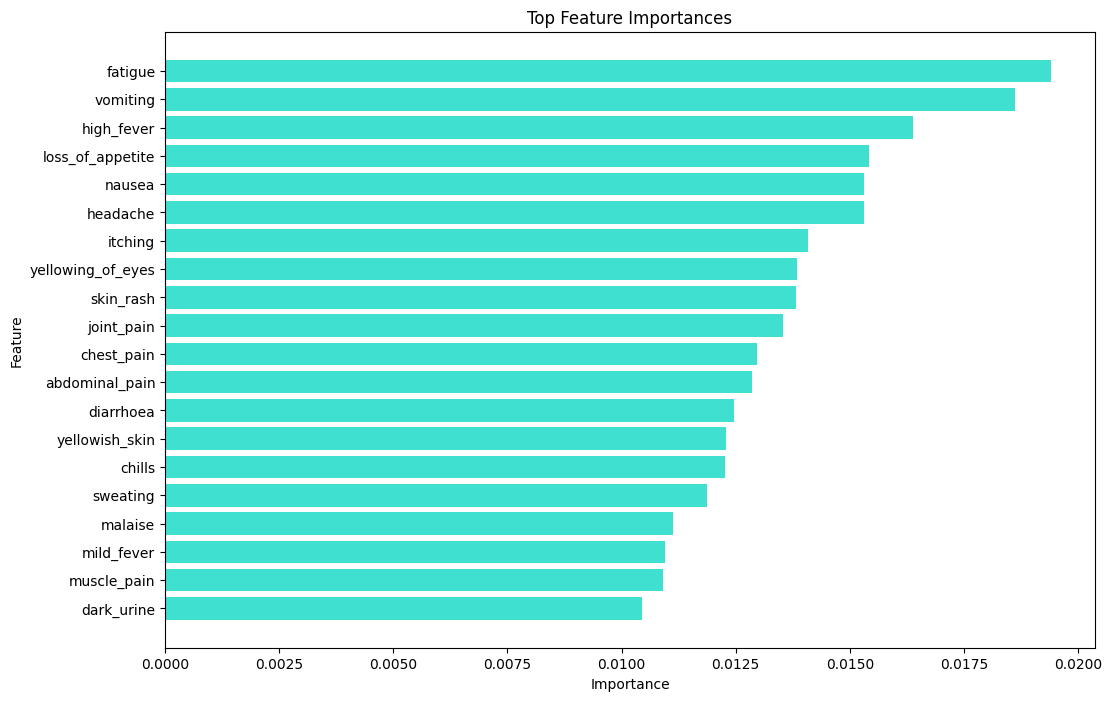

In [49]:
features = [pair[0] for pair in sorted_feature_importances]
importances = [pair[1] for pair in sorted_feature_importances]

plt.figure(figsize=(12, 8))
plt.barh(features[:20], importances[:20], color='turquoise')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [55]:
feature_importances_type = type(sorted_feature_importances)
print("Datatype of sorted_feature_importances:", feature_importances_type)

Datatype of sorted_feature_importances: <class 'list'>


In [56]:
sorted_feature_importances_dict = dict(sorted_feature_importances)
print("Feature importances dictionary:")
print(sorted_feature_importances_dict)

Feature importances dictionary:
{'fatigue': 0.019402976457769002, 'vomiting': 0.018622246474071857, 'high_fever': 0.016394339222621446, 'loss_of_appetite': 0.0154251209840915, 'nausea': 0.015320629148173653, 'headache': 0.015318913997886447, 'itching': 0.014078107705781797, 'yellowing_of_eyes': 0.013854407391060163, 'skin_rash': 0.013818490723932679, 'joint_pain': 0.013546466744278398, 'chest_pain': 0.01296853494240995, 'abdominal_pain': 0.012865131022238886, 'diarrhoea': 0.012462635886451792, 'yellowish_skin': 0.01228964425553542, 'chills': 0.012268424022109693, 'sweating': 0.011881866313074323, 'malaise': 0.011120507858127902, 'mild_fever': 0.010958491530030376, 'muscle_pain': 0.01090319499613877, 'dark_urine': 0.010458214850113334, 'weight_loss': 0.01033983781025103, 'breathlessness': 0.01033344454881962, 'loss_of_balance': 0.010196819807107382, 'lethargy': 0.010186900070368921, 'cough': 0.00999358357827516, 'irritability': 0.009619116357179127, 'excessive_hunger': 0.008934988587208

In [130]:
def predict_disease(model, symptoms, feature_names):
    user_input = pd.DataFrame([symptoms], columns=feature_names)
    prediction = model.predict(user_input)
    decision_scores = model.decision_function(user_input)
    probability_dict = {label: score for label, score in zip(model.classes_, decision_scores[0])}
    predicted_label = prediction[0]
    top_5_probabilities = sorted(probability_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    formatted_probabilities = {label: f'{probability:.4f}' for label, probability in top_5_probabilities}

    return predicted_label, formatted_probabilities

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [129]:
sorted_features = sorted(sorted_feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

top_features = [feature[0] for feature in sorted_features[:20]]

user_symptoms = {}
for feature in sorted_features:
    if feature[0] in top_features:
        user_symptoms[feature[0]] = 1
    else:
        user_symptoms[feature[0]] = 0

print(user_symptoms)

{'high_fever': 1, 'nausea': 1, 'headache': 1, 'itching': 1, 'yellowing_of_eyes': 1, 'skin_rash': 1, 'abdominal_pain': 1, 'diarrhoea': 1, 'sweating': 1, 'mild_fever': 1, 'dark_urine': 1, 'lethargy': 1, 'cough': 1, 'irritability': 1, 'blurred_and_distorted_vision': 1, 'muscle_weakness': 1, 'phlegm': 1, 'red_spots_over_body': 1, 'painful_walking': 1, 'swelling_of_stomach': 1, 'obesity': 0, 'mood_swings': 0, 'burning_micturition': 0, 'receiving_unsterile_injections': 0, 'indigestion': 0, 'slurred_speech': 0, 'unsteadiness': 0, 'silver_like_dusting': 0, 'acute_liver_failure': 0, 'receiving_blood_transfusion': 0, 'blood_in_sputum': 0, 'distention_of_abdomen': 0, 'depression': 0, 'belly_pain': 0, 'skin_peeling': 0, 'inflammatory_nails': 0, 'internal_itching': 0, 'altered_sensorium': 0, 'drying_and_tingling_lips': 0, 'muscle_wasting': 0, 'blister': 0, 'continuous_feel_of_urine': 0, 'blackheads': 0, 'irritation_in_anus': 0, 'bloody_stool': 0, 'rusty_sputum': 0, 'weakness_in_limbs': 0, 'prominen

In [131]:
pipeline = make_pipeline(SimpleImputer(strategy='mean'), best_svm_classifier)

pipeline.fit(X, y)

disease_prediction, probability = predict_disease(pipeline, user_symptoms, X.columns)
print("Predicted Disease:", disease_prediction)
print("Probability:", probability)

Predicted Disease: Chicken pox
Probability: {'Chicken pox': '40.3199', 'Malaria': '39.3193', 'hepatitis A': '38.3153', 'Chronic cholestasis': '37.3148', 'Jaundice': '35.2998'}


# **Randomly Chosen Symptoms**

{'fatigue': 0, 'vomiting': 0, 'high_fever': 1, 'loss_of_appetite': 0, 'nausea': 1, 'headache': 1, 'itching': 1, 'yellowing_of_eyes': 1, 'skin_rash': 1, 'joint_pain': 0, 'chest_pain': 0, 'abdominal_pain': 1, 'diarrhoea': 1, 'yellowish_skin': 0, 'chills': 0, 'sweating': 1, 'malaise': 0, 'mild_fever': 1, 'muscle_pain': 0, 'dark_urine': 1, 'weight_loss': 0, 'breathlessness': 0, 'loss_of_balance': 0, 'lethargy': 1, 'cough': 1, 'irritability': 1, 'excessive_hunger': 0, 'stomach_pain': 0, 'blurred_and_distorted_vision': 1, 'dizziness': 0, 'family_history': 0, 'back_pain': 0, 'fast_heart_rate': 0, 'muscle_weakness': 1, 'swelled_lymph_nodes': 0, 'swelling_joints': 0, 'phlegm': 1, 'red_spots_over_body': 1, 'neck_pain': 0, 'restlessness': 0, 'stiff_neck': 0, 'painful_walking': 1, 'swelling_of_stomach': 1, 'acidity': 0, 'continuous_sneezing': 0, 'obesity': 1, 'patches_in_throat': 0, 'mood_swings': 1, 'burning_micturition': 1, 'receiving_unsterile_injections': 1, 'indigestion': 1, 'abnormal_menstru

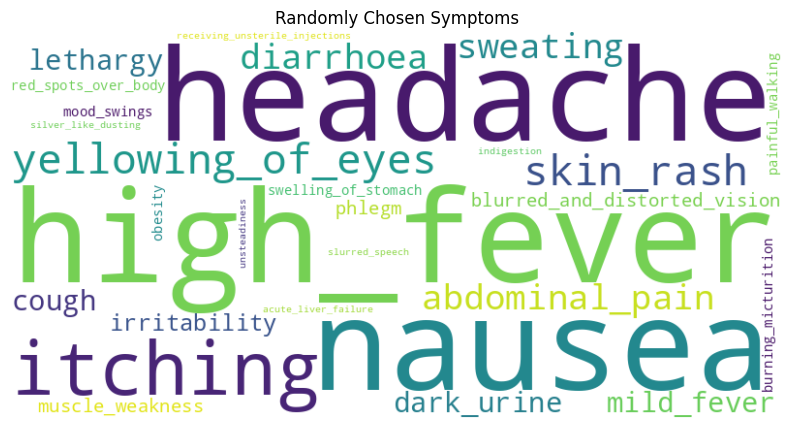

In [85]:
import random
from wordcloud import WordCloud

def fill_values(dictionary):
    for key in dictionary:
        dictionary[key] = random.choice([0, 1])

my_dict = sorted_feature_importances_dict
fill_values(my_dict)
print(my_dict)
chosen_features = [feature for feature, importance in my_dict.items() if importance == 1]
text = ' '.join(chosen_features)

wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords = None, min_font_size = 10).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Randomly Chosen Symptoms')
plt.show()

In [109]:
pipeline = make_pipeline(SimpleImputer(strategy='mean'), best_svm_classifier)

pipeline.fit(X, y)

disease_prediction, probability = predict_disease(pipeline, my_dict, X.columns)
print("Predicted Disease:", disease_prediction)
print("Probability:", probability)

Predicted Disease: Hepatitis B
Probability: {'Hepatitis B': '40.2942', 'Malaria': '39.2978', 'Chicken pox': '38.2744', 'hepatitis A': '36.2498', 'Psoriasis': '36.2485'}


# **Interactive Symptom Selection Interface**

In [87]:
def get_column_names(df):
    return list(df.columns)
column_names = get_column_names(df)
symptom_list = column_names[:-1]
print(symptom_list)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [132]:
import ipywidgets as widgets
from IPython.display import display

selected_symptoms = set()

def toggle_symptom(button):
    if button.description in selected_symptoms:
        selected_symptoms.remove(button.description)
        button.button_style = ''
    else:
        selected_symptoms.add(button.description)
        button.button_style = 'success'

def submit(button):
    print(f"Selected symptoms: {selected_symptoms}")

def clear_all(button):
    for button in symptom_buttons:
        button.button_style = ''
    selected_symptoms.clear()
    print("Cleared all selections")

symptom_list
symptom_buttons = [widgets.Button(description=symptom_name, layout=widgets.Layout(width='auto')) for symptom_name in symptom_list]
selected_symptoms_dict = {symptom: 1 if symptom in selected_symptoms else 0 for symptom in symptom_list}
button_rows = []
for i in range(0, len(symptom_buttons), 10):
    button_row = widgets.HBox(symptom_buttons[i:i+10])
    button_rows.append(button_row)

buttons_layout = widgets.VBox(button_rows)

for button in symptom_buttons:
    button.on_click(toggle_symptom)

submit_button = widgets.Button(description="Submit")
submit_button.on_click(submit)

clear_all_button = widgets.Button(description="Clear All")
clear_all_button.on_click(clear_all)
display(buttons_layout, widgets.HBox([submit_button, clear_all_button]))

Selected symptoms: {'muscle_pain', 'headache', 'bloody_stool', 'diarrhoea', 'high_fever', 'abdominal_pain', 'vomiting', 'nausea'}


In [135]:
selected_symptoms_dict = {symptom: 1 if symptom in selected_symptoms else 0 for symptom in symptom_list}
pipeline = make_pipeline(SimpleImputer(strategy='mean'), best_svm_classifier)
pipeline.fit(X, y)

disease_prediction, probability = predict_disease(pipeline,selected_symptoms_dict, X.columns)
print("Predicted Disease:", disease_prediction)
print("Probability:", probability)

Predicted Disease: Malaria
Probability: {'Malaria': '40.3269', 'Typhoid': '39.3242', 'Paralysis (brain hemorrhage)': '38.3245', '(vertigo) Paroymsal  Positional Vertigo': '37.3218', 'Gastroenteritis': '36.3225'}


<br>
<br>
<br>



**Conclusion : Predicting Diseases from User Symptoms**

In this project, we developed a MLmodel to predict diseases based on user-reported symptoms. Using a dataset containing symptom profiles and corresponding disease labels, we explored several classification algorithms to identify the most effective model.

After evaluating multiple models including Logistic Regression, Gradient Boosting, Naive Bayes, K-Nearest Neighbors, Support Vector Machines, Decision Trees, and Random Forest, we found that the Support Vector Machines (SVM) model exhibited the highest accuracy, precision, recall, and F1 score among the tested algorithms.

To further enhance the performance of the **SVM model**, we conducted hyperparameter tuning using GridSearchCV, optimizing parameters such as the regularization parameter (C) and kernel type. As a result, we achieved an accuracy of **92.03%** on the test dataset, indicating the robustness and effectiveness of our tuned SVM model.

we employed cross-validation obtaining consistent accuracy scores across multiple folds. Additionally, we conducted feature importance analysis using Random Forest to identify the most influential symptoms for disease prediction.

Overall, this project demonstrates the feasibility and utility of machine learning in healthcare applications, showcasing how predictive models can aid in disease diagnosis and decision-making processes.
